In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import optimize
from scipy.stats import norm, lognorm, kstest,mode
from scipy.optimize import curve_fit
from matplotlib import style
import matplotlib.ticker as mticker
style.use('seaborn-dark')


In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


#### About Dataset
##### Context
The data scientists at Big Mart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, Big Mart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.
##### Content
The dataset provides the product details and the outlet information of the products purchased with their sales value split into a train set (8523) and a test (5681) set.

In [3]:
#let's load the dataset:  source kaggle
train_df = pd.read_csv("Train_1.csv")       
test_df = pd.read_csv("Test_1.csv")

In [4]:
test_df

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
train_df.shape

(8523, 12)

In [6]:
train_df.select_dtypes(include='object').nunique()

ProductID       1559
FatContent         5
ProductType       16
OutletID          10
OutletSize         3
LocationType       3
OutletType         4
dtype: int64

In [7]:
train_df.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
train_df.describe(include= ['object'])

,ProductID,FatContent,ProductType,OutletID,OutletSize,LocationType,OutletType
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
train_df_f= train_df.copy()  #unmodified data
test_df_f = test_df.copy()

In [11]:
comb_df = pd.concat([test_df,train_df])

In [12]:
comb_df

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [13]:
comb_df['ProductID'].isnull().sum()

0

In [14]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          14204 non-null  object 
 1   Weight             11765 non-null  float64
 2   FatContent         14204 non-null  object 
 3   ProductVisibility  14204 non-null  float64
 4   ProductType        14204 non-null  object 
 5   MRP                14204 non-null  float64
 6   OutletID           14204 non-null  object 
 7   EstablishmentYear  14204 non-null  int64  
 8   OutletSize         10188 non-null  object 
 9   LocationType       14204 non-null  object 
 10  OutletType         14204 non-null  object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [15]:
missing_val = comb_df.isnull().sum()
missing_val

ProductID               0
Weight               2439
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           4016
LocationType            0
OutletType              0
OutletSales          5681
dtype: int64

In [16]:
col_names = comb_df.columns
col_names

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')

In [17]:
##

In [18]:
comb_sorted = comb_df.sort_values(by=['ProductID'])
comb_sorted.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
7467,DRA12,11.6,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
8043,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
5081,DRA12,11.6,LF,0.041010,Soft Drinks,141.0154,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
3912,DRA12,NaN,Low Fat,0.040748,Soft Drinks,140.0154,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [19]:
# Reset the index of the DataFrame
comb_df.reset_index(inplace=True)
# Group the dataframe by Item_Identifier and fill missing weight values with the corresponding non-null value
comb_df['Weight'] = comb_df.groupby('ProductID')['Weight'].fillna(method='ffill')
# Check for any remaining missing values
missing_values = comb_df['Weight'].isnull().sum()
print(f"Number of missing weight values after replacement: {missing_values}")


Number of missing weight values after replacement: 296


In [20]:
# Reset the index of the DataFrame
# Group the dataframe by Item_Identifier and fill missing weight values with the corresponding non-null value
comb_df['OutletSize'] = comb_df.groupby('OutletType')['OutletSize'].fillna(method='ffill')
# Check for any remaining missing values
missing_values = comb_df['OutletSize'].isnull().sum()
print(f"Number of missing outletSize values after replacement: {missing_values}")


Number of missing outletSize values after replacement: 1


In [21]:
comb_df

,index,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN
2,2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
3,3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN
4,4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
14200,8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
14201,8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
14202,8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [22]:
comb_df = comb_df.drop(columns=[ 'index'])

In [23]:
comb_df.shape

(14204, 12)

In [24]:
comb_df.isnull().sum()

ProductID               0
Weight                296
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize              1
LocationType            0
OutletType              0
OutletSales          5681
dtype: int64

In [25]:
comb_df = comb_df.dropna(subset=["Weight","OutletSize","OutletSales"])

In [26]:
comb_df.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [27]:
comb_df=comb_df.reset_index(drop=True)

In [28]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8517 entries, 0 to 8516
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8517 non-null   object 
 1   Weight             8517 non-null   float64
 2   FatContent         8517 non-null   object 
 3   ProductVisibility  8517 non-null   float64
 4   ProductType        8517 non-null   object 
 5   MRP                8517 non-null   float64
 6   OutletID           8517 non-null   object 
 7   EstablishmentYear  8517 non-null   int64  
 8   OutletSize         8517 non-null   object 
 9   LocationType       8517 non-null   object 
 10  OutletType         8517 non-null   object 
 11  OutletSales        8517 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 798.6+ KB


In [29]:
comb_df.shape

(8517, 12)

### Exploratory Data Analysis

# Histogram

In [30]:
comb_df.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,8517.000000,8517.000000,8517.000000,8517.000000,8517.000000
mean,12.874739,0.066129,140.965780,1997.840906,2180.598188
std,4.646257,0.051606,62.260729,8.367775,1706.247156
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026986,93.809400,1987.000000,833.581600
50%,12.650000,0.053925,142.915400,1999.000000,1794.331000
75%,16.850000,0.094603,185.626600,2004.000000,3099.964800
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


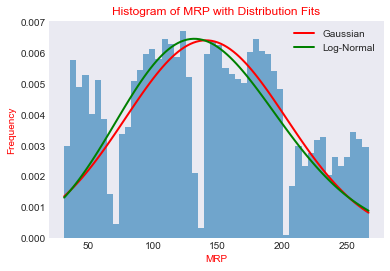

In [31]:

# Plot the histogram of MRP
plt.hist(comb_df['MRP'], bins=50, density=True, alpha=0.6)

# Fit a Gaussian distribution
mu, std = norm.fit(comb_df['MRP'])
x = np.linspace(comb_df['MRP'].min(), comb_df['MRP'].max(), 100)
p_gaussian = norm.pdf(x, mu, std)
plt.plot(x, p_gaussian, 'r', linewidth=2)

# Fit a Log-Normal distribution
shape, loc, scale = lognorm.fit(comb_df['MRP'])
p_lognormal = lognorm.pdf(x, shape, loc, scale)
plt.plot(x, p_lognormal, 'g', linewidth=2)

# Show the plot
plt.xlabel('MRP',color = 'r')
plt.ylabel('Frequency',color = 'r')
plt.title('Histogram of MRP with Distribution Fits', color = 'r')
plt.legend(['Gaussian', 'Log-Normal'])
plt.show()


In [32]:

item_mrp = comb_df['MRP']

# Fit a Gaussian distribution
mu_gaussian, std_gaussian = norm.fit(item_mrp)

# Fit a Log-Normal distribution
shape_lognormal, loc_lognormal, scale_lognormal = lognorm.fit(item_mrp)

# Calculate Kolmogorov-Smirnov statistic and p-value for Gaussian fit
ks_stat_gaussian, p_value_gaussian = kstest(item_mrp, 'norm', args=(mu_gaussian, std_gaussian))
print("Gaussian Fit:")
print("Kolmogorov-Smirnov Statistic:", ks_stat_gaussian)
print("p-value:", p_value_gaussian)

# Calculate Kolmogorov-Smirnov statistic and p-value for Log-Normal fit
ks_stat_lognormal, p_value_lognormal = kstest(item_mrp, 'lognorm', args=(shape_lognormal, loc_lognormal, scale_lognormal))
print("\nLog-Normal Fit:")
print("Kolmogorov-Smirnov Statistic:", ks_stat_lognormal)
print("p-value:", p_value_lognormal)
if p_value_gaussian > p_value_lognormal:
    print("Gaussian is a better fit")
else:
    print("                                   Log-Normal is a better fit                  ")

Gaussian Fit:
Kolmogorov-Smirnov Statistic: 0.045696392955784315
p-value: 6.812141104514639e-16

Log-Normal Fit:
Kolmogorov-Smirnov Statistic: 0.04811869616238293
p-value: 1.412028553211679e-17
Gaussian is a better fit


In [33]:
col_names

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')

In [34]:
comb_df['OutletType'].nunique()

4

Let's analyze what could be a good comparison:
##### weight vs FatContent  
##### weight vs outletSales
##### weight vs productType
##### weight vs MRP
##### OutletSales vs OutletType
##### OutletSales vs Outlet size
##### OutletSales vs Outlet Location
##### ProductVisibility vs OutletSales
##### ProductVisibility vs MRP
etc.

In [35]:
comb_df

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8512,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8513,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8514,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8515,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [36]:
comb_df['FatContent'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [37]:
comb_df['FatContent'] = comb_df['FatContent'].replace('LF', 'Low Fat')
comb_df['FatContent'] = comb_df['FatContent'].replace('low fat', 'Low Fat')
comb_df['FatContent'] = comb_df['FatContent'].replace('reg', 'Regular')


In [38]:
comb_df['FatContent'].unique()

array(['Low Fat', 'Regular'], dtype=object)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NameError: name 'df' is not defined

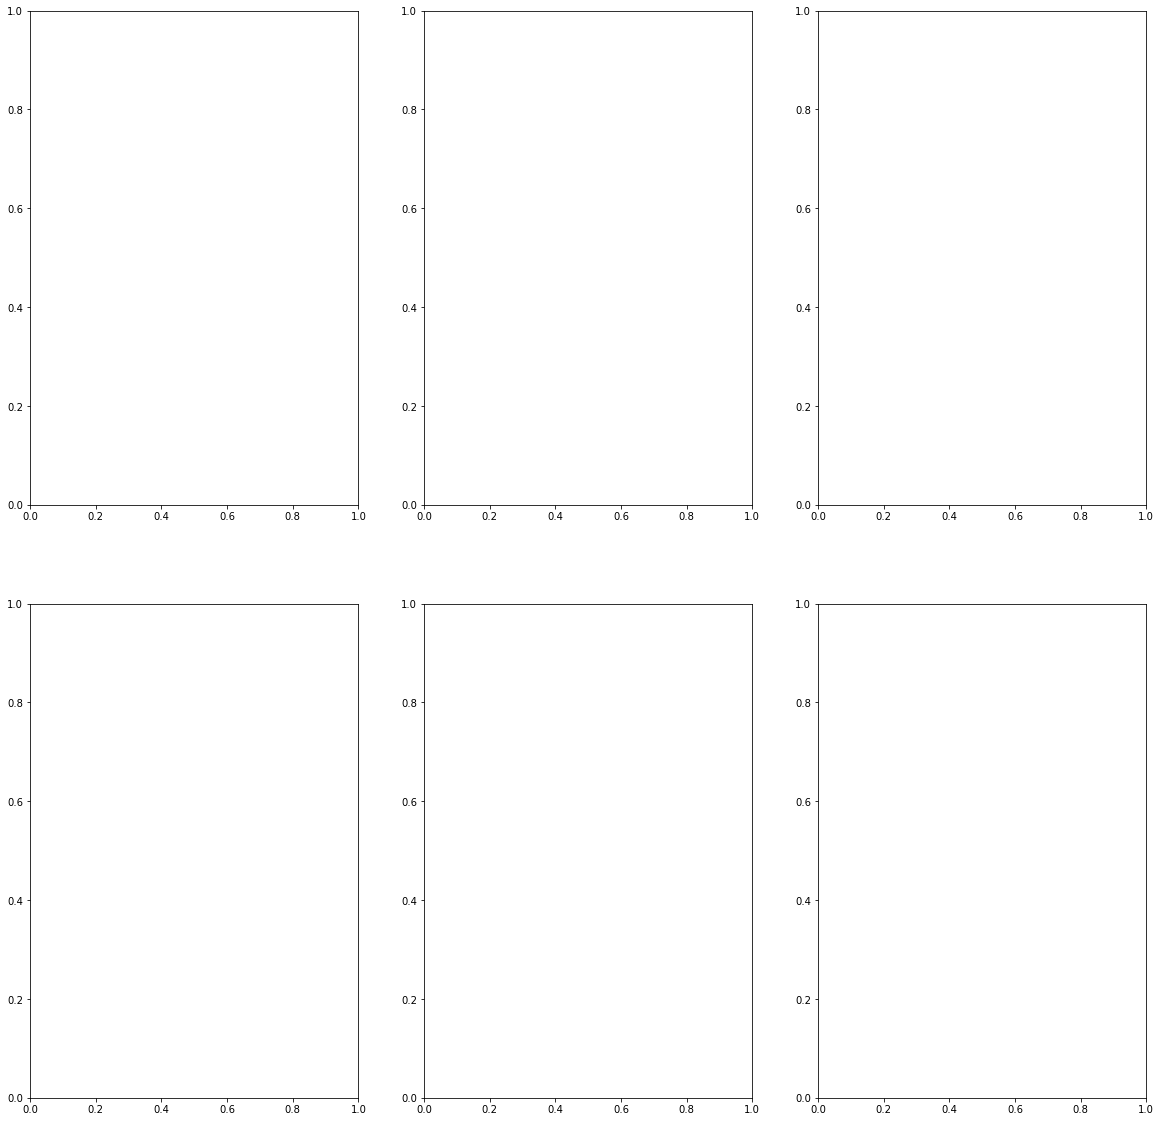

In [2]:
# list of categorical variables to plot
cat_vars = ['FatContent', 'ProductType', 'OutletID', 'OutletSize', 'LocationType', 
            'OutletType']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='OutletSales', data=comb_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()


In [40]:
fig.clear()


<AxesSubplot:xlabel='ProductVisibility', ylabel='Count'>

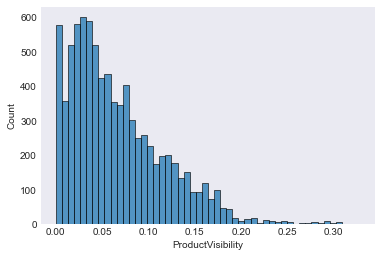

In [41]:
sns.histplot(x='ProductVisibility', data=comb_df)

In [42]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8517 entries, 0 to 8516
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8517 non-null   object 
 1   Weight             8517 non-null   float64
 2   FatContent         8517 non-null   object 
 3   ProductVisibility  8517 non-null   float64
 4   ProductType        8517 non-null   object 
 5   MRP                8517 non-null   float64
 6   OutletID           8517 non-null   object 
 7   EstablishmentYear  8517 non-null   int64  
 8   OutletSize         8517 non-null   object 
 9   LocationType       8517 non-null   object 
 10  OutletType         8517 non-null   object 
 11  OutletSales        8517 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 798.6+ KB


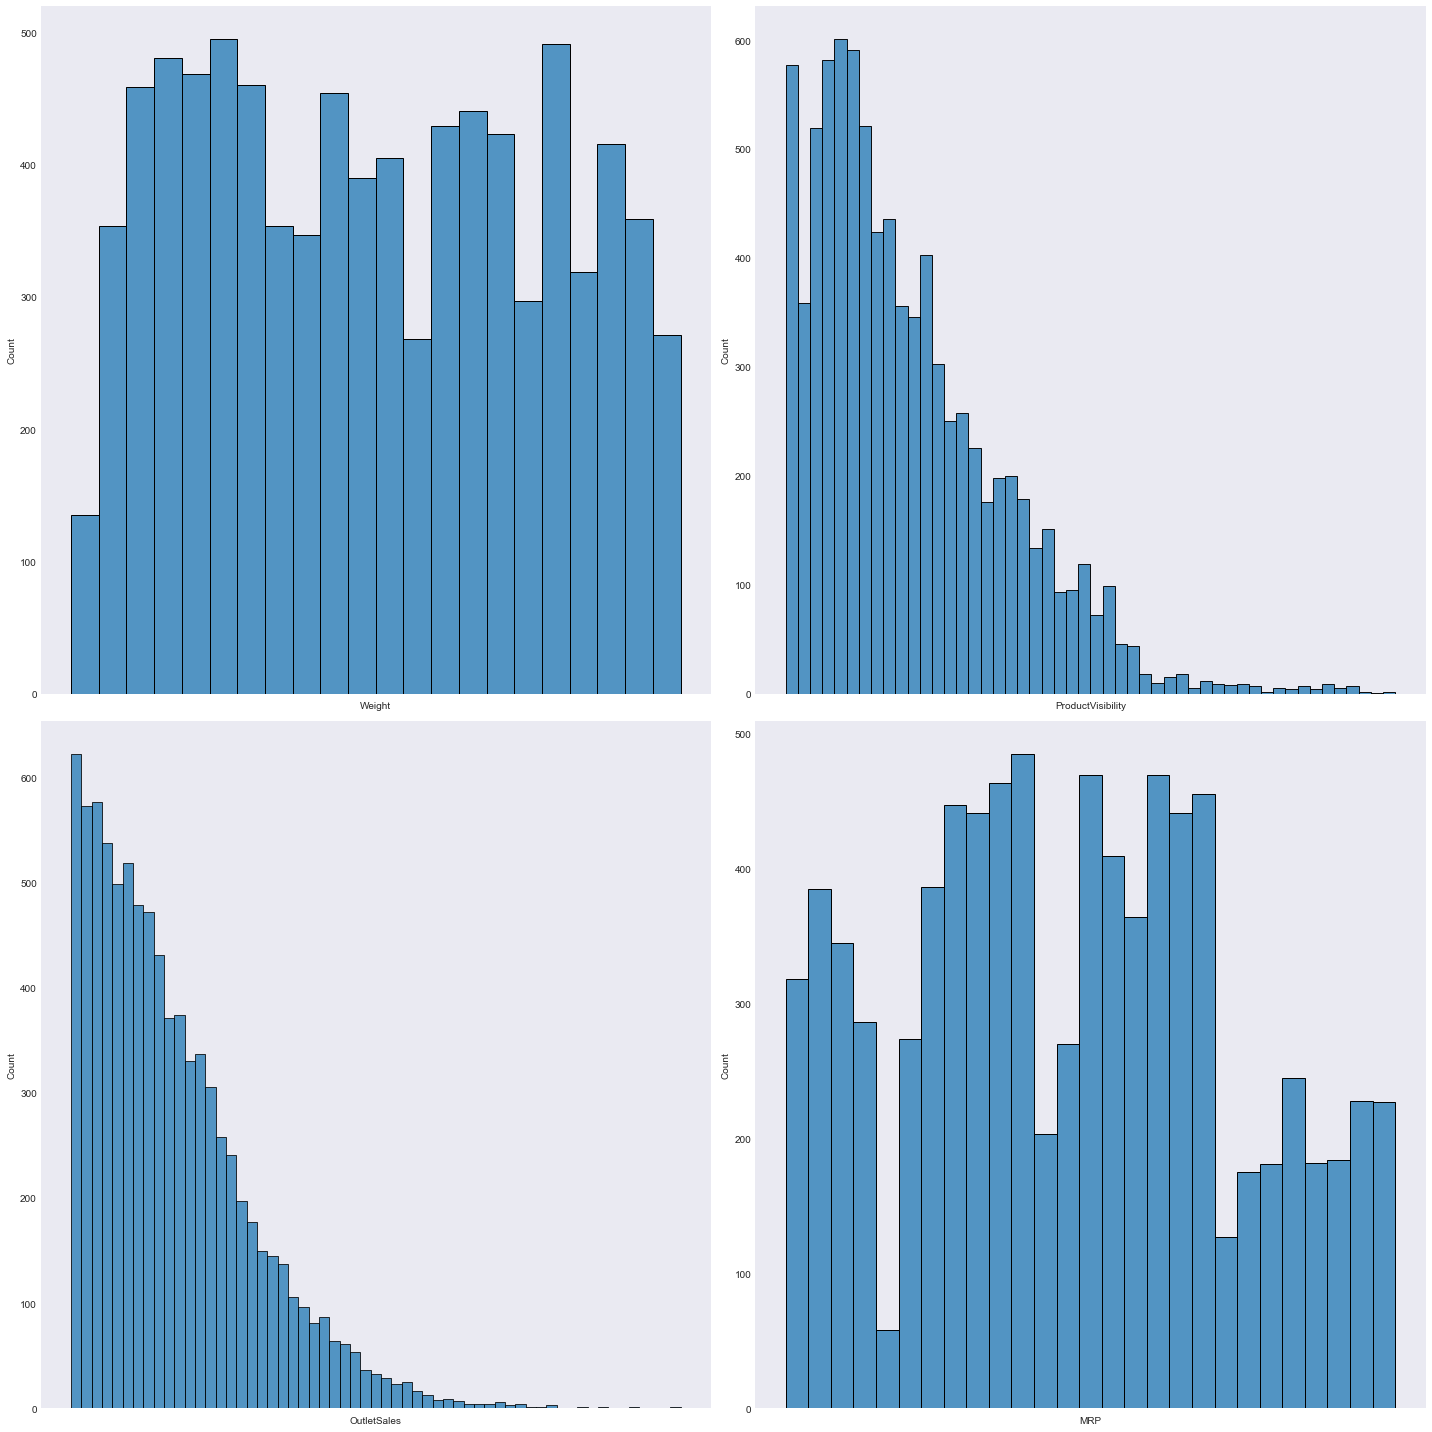

In [43]:
# list of categorical variables to plot
cat_vars = ['Weight', 'ProductVisibility', 'OutletSales', 'MRP']

# create figure with subplots
n_rows = 2
n_cols = 2
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=cat_vars[i], data=comb_df, ax = axs[i])
    ticks_loc = axs[i].get_xticks().tolist()
    axs[i].xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

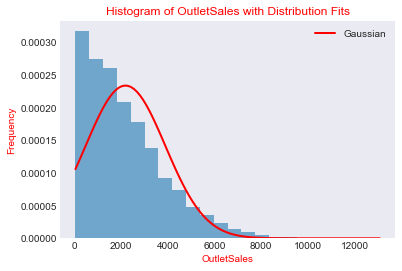

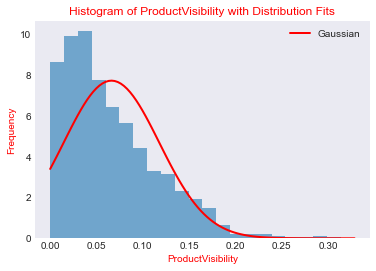

In [44]:
# Plot the histogram of OutletSales
plt.hist(comb_df['OutletSales'], bins=22, density=True, alpha=0.6)

# Fit a Gaussian distribution
mu, std = norm.fit(comb_df['OutletSales'])
x = np.linspace(comb_df['OutletSales'].min(), comb_df['OutletSales'].max(), 100)
p_gaussian = norm.pdf(x, mu, std)
plt.plot(x, p_gaussian, 'r', linewidth=2)


# Show the plot
plt.xlabel('OutletSales',color = 'r')
plt.ylabel('Frequency',color = 'r')
plt.title('Histogram of OutletSales with Distribution Fits', color = 'r')
plt.legend(['Gaussian'])
plt.show()
# Plot the histogram of ProductVisibility
plt.hist(comb_df['ProductVisibility'], bins=22, density=True, alpha=0.6)

# Fit a Gaussian distribution
mu, std = norm.fit(comb_df['ProductVisibility'])
x = np.linspace(comb_df['ProductVisibility'].min(), comb_df['ProductVisibility'].max(), 100)
p_gaussian = norm.pdf(x, mu, std)
plt.plot(x, p_gaussian, 'r', linewidth=2)


# Show the plot
plt.xlabel('ProductVisibility',color = 'r')
plt.ylabel('Frequency',color = 'r')
plt.title('Histogram of ProductVisibility with Distribution Fits', color = 'r')
plt.legend(['Gaussian'])
plt.show()

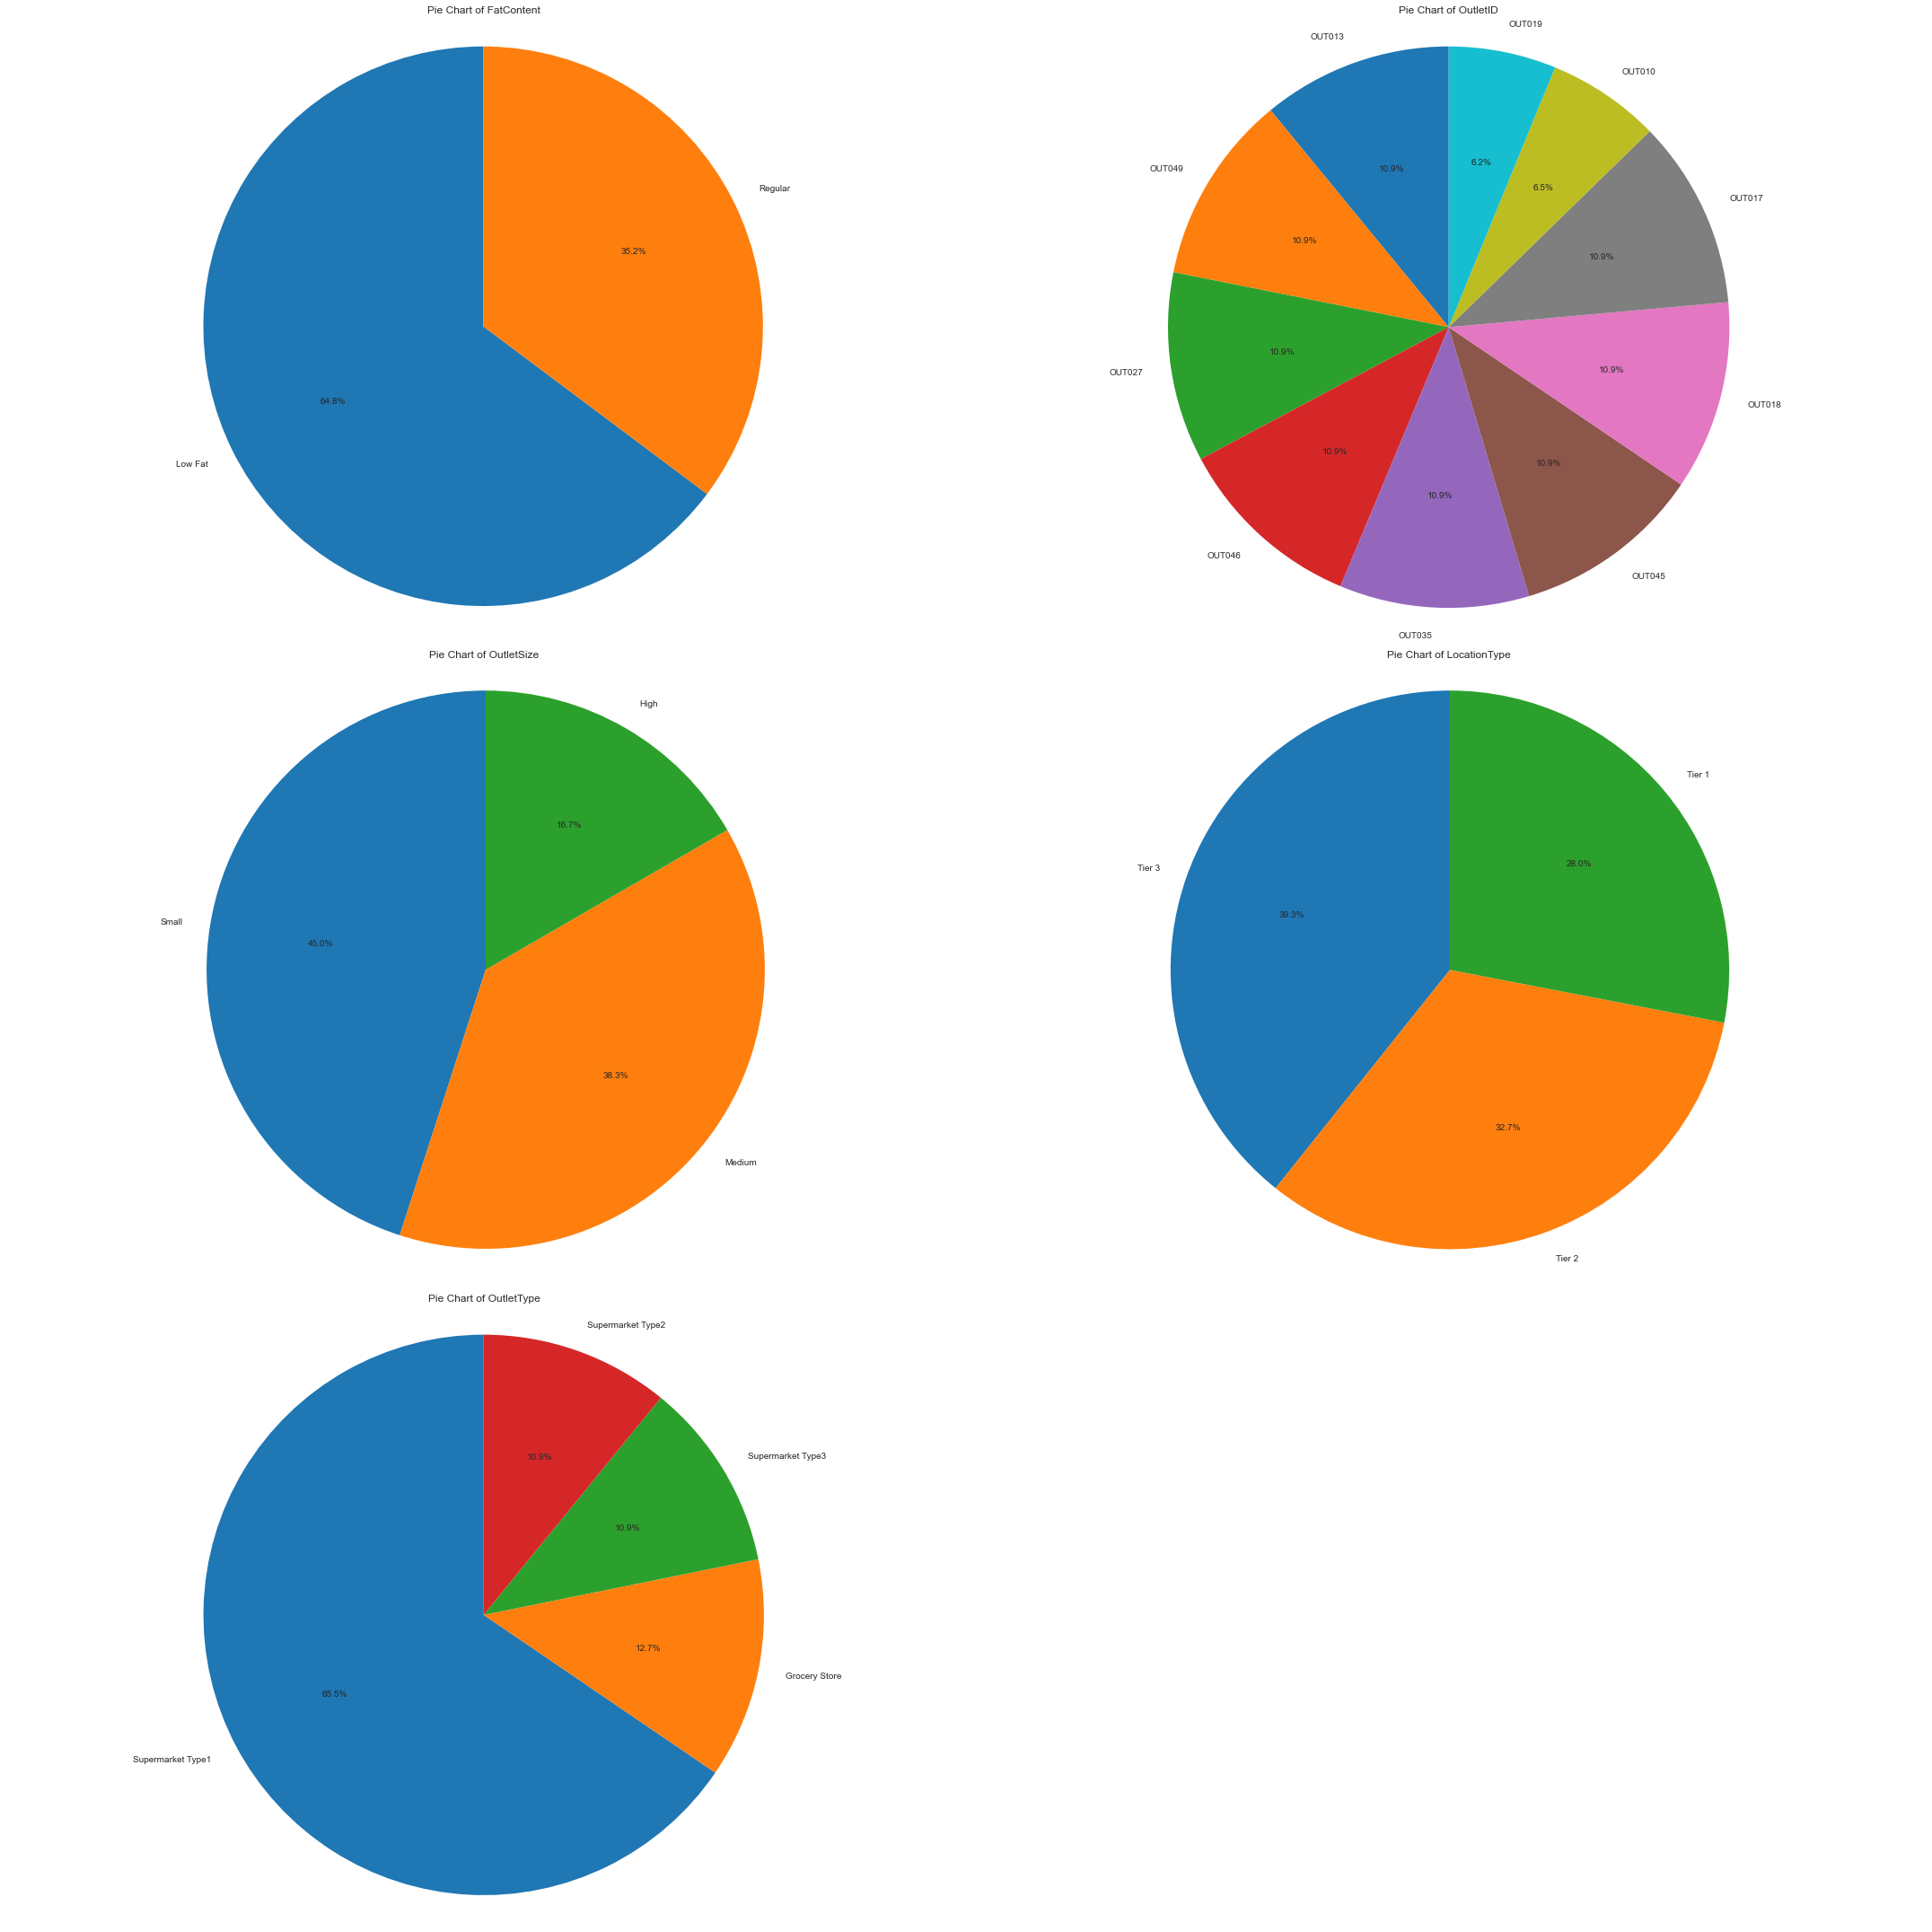

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the variables for which you want to draw pie charts
variables = ['FatContent', 'OutletID', 'OutletSize', 'LocationType', 
            'OutletType']

# Calculate the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 2
num_plots = len(variables)
# Create a new figure and axes for subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 30))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Loop through each variable
for i, var in enumerate(variables):
    # Count the occurrences of each variable
    counts = comb_df[var].value_counts()
    # Create a pie chart
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Pie Chart of {var}')
    axs[i].axis('equal')  # Equal aspect ratio ensures a circular pie chart
# Remove the empty subplot if present
if num_plots < num_rows * num_cols:
    fig.delaxes(axs[-1])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [46]:
col_names

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')

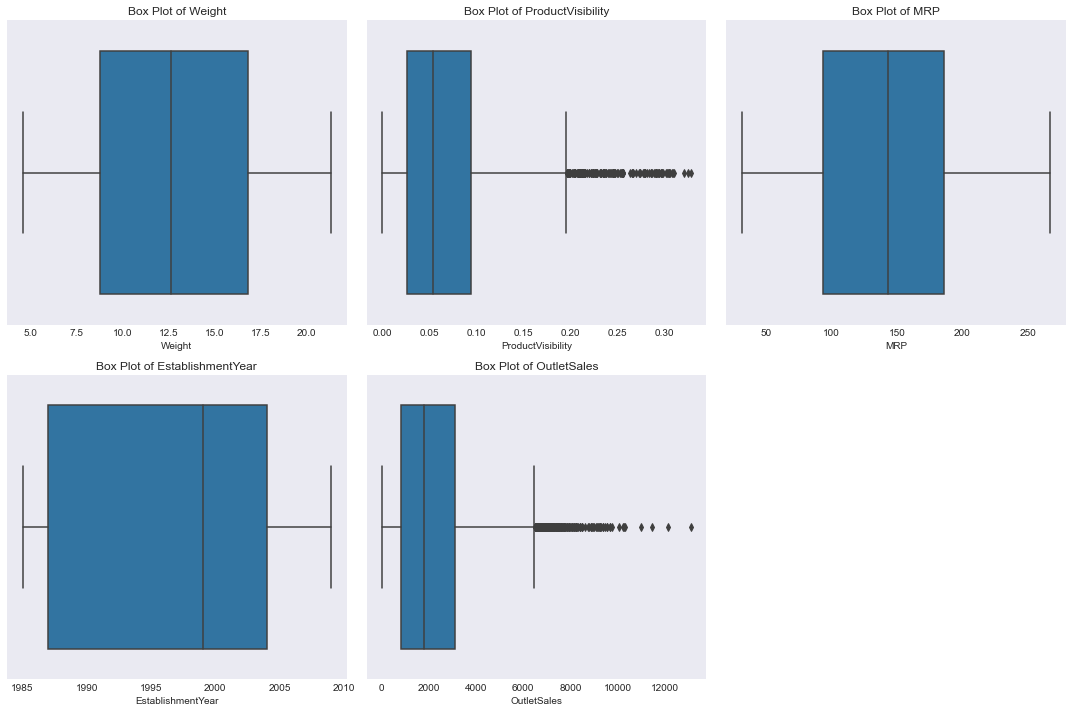

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the numerical features for box plots
numerical_features = ['Weight', 'ProductVisibility', 'MRP', 'EstablishmentYear', 'OutletSales']

# Calculate the number of rows and columns for the subplot grid
num_rows = 2
num_cols = 3

# Create subplots for box plots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Loop through each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=feature, data=comb_df, ax=axs[i])
    axs[i].set_title(f'Box Plot of {feature}')

# Hide the empty subplots
for j in range(len(numerical_features), num_rows * num_cols):
    fig.delaxes(axs[j])

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()


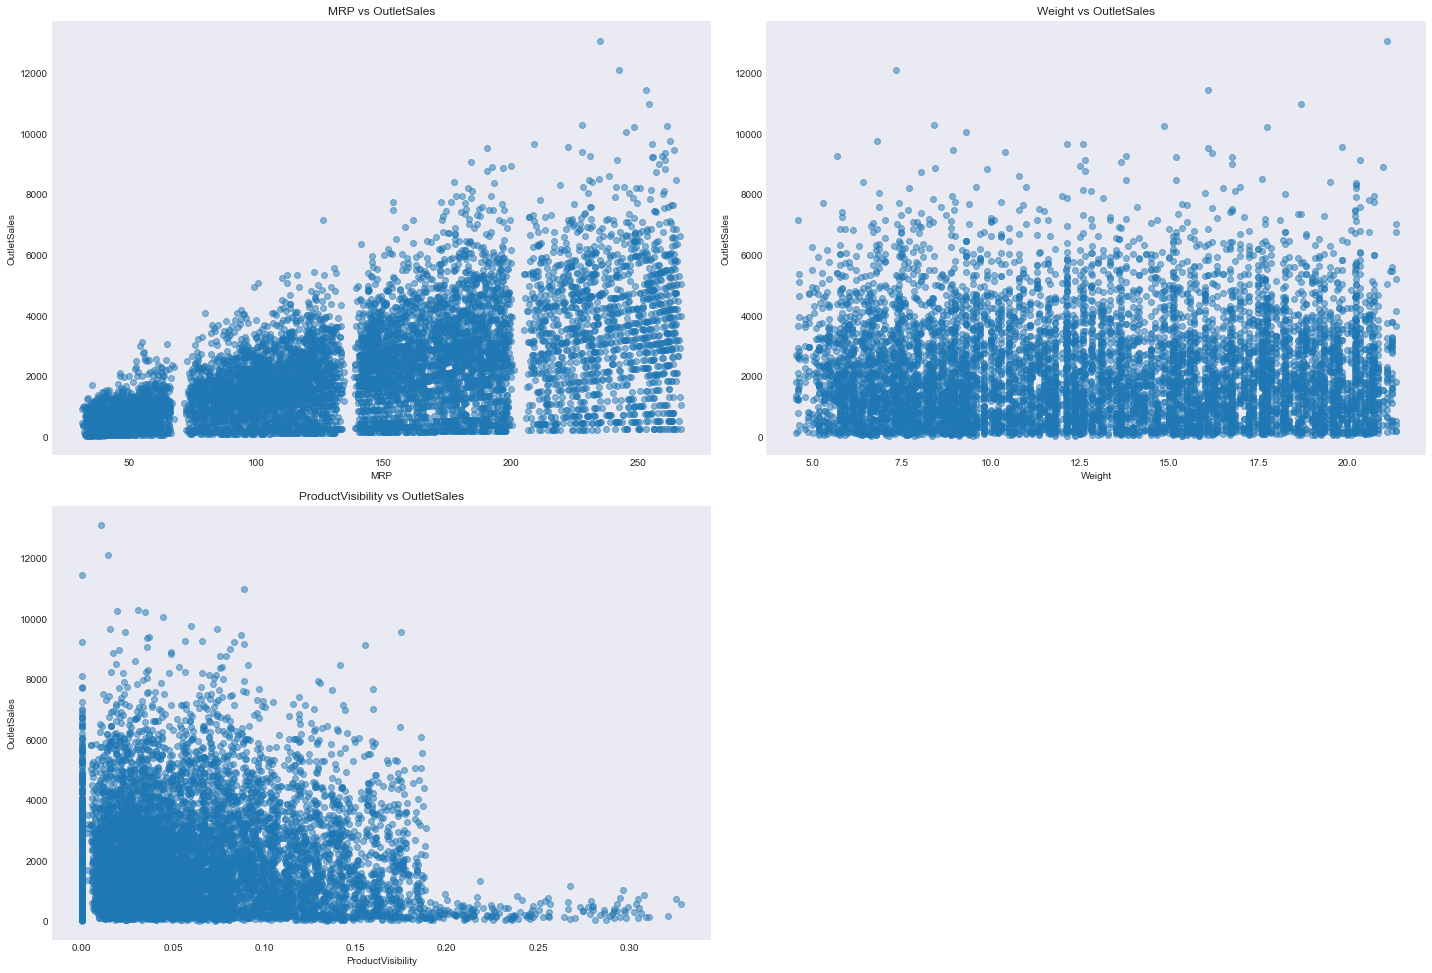

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the variables for scatter plots
variables = [
    ('MRP', 'OutletSales'),
    ('Weight', 'OutletSales'),
    ('ProductVisibility', 'OutletSales')
]

# Calculate the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 2

# Create a new figure and axes for subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Loop through each variable
for i, (x_var, y_var) in enumerate(variables):
    # Create a scatter plot
    axs[i].scatter(comb_df[x_var], comb_df[y_var], alpha=0.5)
    axs[i].set_xlabel(x_var)
    axs[i].set_ylabel(y_var)
    axs[i].set_title(f'{x_var} vs {y_var}')

# Remove any empty subplots if present
if len(variables) < num_rows * num_cols:
    for j in range(len(variables), num_rows * num_cols):
        fig.delaxes(axs[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [49]:
#  visualize the top-selling items using a bar chart. 
item_sales = comb_df.groupby('ProductID')['OutletSales'].sum().reset_index()


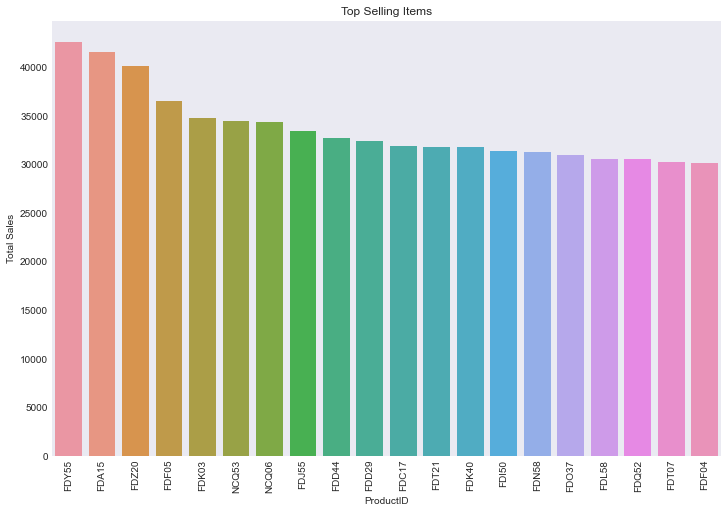

In [50]:

item_sales = item_sales.sort_values('OutletSales', ascending=False)
# create bar plot of top selling items
plt.figure(figsize=(12, 8))
sns.barplot(x='ProductID', y='OutletSales', data=item_sales.head(20))
plt.xticks(rotation=90)
plt.xlabel('ProductID')
plt.ylabel('Total Sales')
plt.title('Top Selling Items')
plt.show()


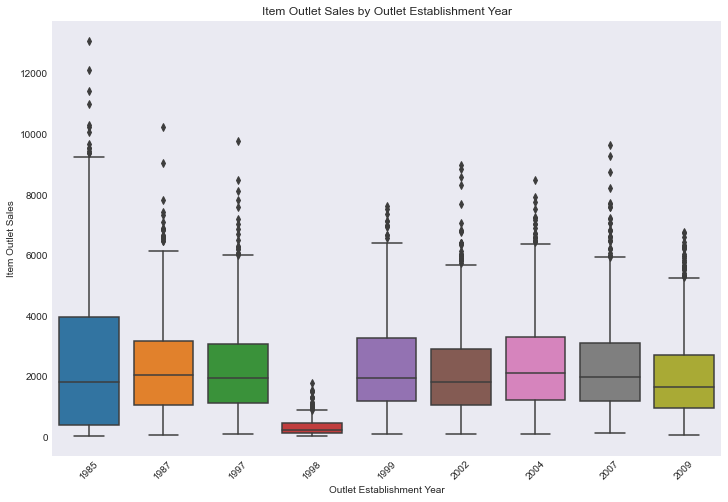

In [51]:
# Time-based Analysis
# Outlet establishment year
plt.figure(figsize=(12, 8))
sns.boxplot(x='EstablishmentYear', y='OutletSales', data=comb_df)
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.title('Item Outlet Sales by Outlet Establishment Year')
plt.xticks(rotation=45)
plt.show()


In [52]:
# Correlation Analysis
correlation = comb_df[['MRP', 'OutletSales']].corr()
print(correlation)


                  MRP  OutletSales
MRP          1.000000     0.567824
OutletSales  0.567824     1.000000


<AxesSubplot:xlabel='EstablishmentYear', ylabel='OutletSales'>

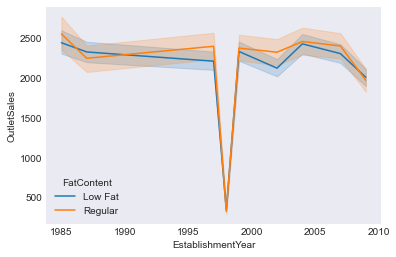

In [53]:
sns.lineplot(data=comb_df, x="EstablishmentYear", y="OutletSales", hue="FatContent")

<AxesSubplot:xlabel='EstablishmentYear', ylabel='OutletSales'>

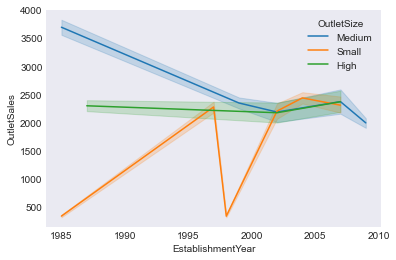

In [54]:
sns.lineplot(data=comb_df, x="EstablishmentYear", y="OutletSales", hue="OutletSize")

<AxesSubplot:xlabel='EstablishmentYear', ylabel='OutletSales'>

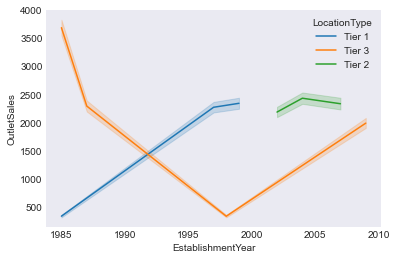

In [55]:
sns.lineplot(data=comb_df, x="EstablishmentYear", y="OutletSales", hue="LocationType")

# Data_Preprocessing


Well, We combined the train and test dataset earlier for EDA. For the model training we will need train and test datasets individually

In [56]:
train_df = train_df_f
train_df

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [57]:
missing_val = train_df.isnull().sum()
missing_val

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [58]:
# Reset the index of the DataFrame
train_df.reset_index(inplace=True)
# Group the dataframe by Item_Identifier and fill missing weight values with the corresponding non-null value
train_df['Weight'] = train_df.groupby('ProductID')['Weight'].fillna(method='ffill')
# Check for any remaining missing values
missing_values = train_df['Weight'].isnull().sum()
print(f"Number of missing weight values after replacement: {missing_values}")

Number of missing weight values after replacement: 272


In [59]:
#Check the missing value
check_missing = train_df.isnull().sum() * 100 / train_df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

OutletSize    28.276428
Weight         3.191365
dtype: float64

In [60]:
# Reset the index of the DataFrame
# Group the dataframe by Item_Identifier and fill missing weight values with the corresponding non-null value
train_df['OutletSize'] = train_df.groupby('OutletType')['OutletSize'].fillna(method='ffill')
# Check for any remaining missing values
missing_values = train_df['OutletSize'].isnull().sum()
print(f"Number of missing outletSize values after replacement: {missing_values}")


Number of missing outletSize values after replacement: 1


In [61]:
train_df = train_df.drop(columns=[ 'index'])

In [62]:
train_df = train_df.dropna(subset=["Weight","OutletSize","OutletSales"])

In [63]:
train_df.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [64]:
train_df['FatContent'] = train_df['FatContent'].replace('LF', 'Low Fat')
train_df['FatContent'] = train_df['FatContent'].replace('low fat', 'Low Fat')
train_df['FatContent'] = train_df['FatContent'].replace('reg', 'Regular')


In [65]:
train_df.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')

In [66]:
#ProductID is of no significance as such. it's just an indexing
train_df.drop(columns = 'ProductID',inplace = True)

In [67]:
# Identify columns with object or categorical data types
categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns

# Print the columns suitable for one-hot encoding
for column in categorical_columns:
    print(column,":",train_df[column].unique())


FatContent : ['Low Fat' 'Regular']
ProductType : ['Dairy' 'Soft Drinks' 'Meat' 'Household' 'Baking Goods' 'Snack Foods'
 'Frozen Foods' 'Fruits and Vegetables' 'Breakfast' 'Health and Hygiene'
 'Hard Drinks' 'Breads' 'Canned' 'Starchy Foods' 'Others' 'Seafood']
OutletID : ['OUT049' 'OUT018' 'OUT013' 'OUT045' 'OUT017' 'OUT046' 'OUT035' 'OUT010'
 'OUT027' 'OUT019']
OutletSize : ['Medium' 'High' 'Small']
LocationType : ['Tier 1' 'Tier 3' 'Tier 2']
OutletType : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [68]:
X_train =train_df.drop(columns= ['OutletSales'])
y_train = train_df['OutletSales']
X_train

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
5,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [69]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=i)

<IPython.core.display.Javascript object>

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor

In [71]:
numeric_processor=Pipeline(steps=[("scaler",StandardScaler())])
numeric_processor

Pipeline(steps=[('scaler', StandardScaler())])

In [72]:
categorical_processor=Pipeline(steps=[('ohe',OneHotEncoder(handle_unknown='ignore'))])

In [73]:
categorical_processor

Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore'))])

In [74]:
preprocessor = ColumnTransformer([('categorical',categorical_processor, ['FatContent','ProductType','OutletID','OutletSize','LocationType','OutletType']),
                                  ('Numerical',numeric_processor,['Weight','ProductVisibility','MRP','EstablishmentYear'])])

In [75]:
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['FatContent', 'ProductType', 'OutletID',
                                  'OutletSize', 'LocationType', 'OutletType']),
                                ('Numerical',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Weight', 'ProductVisibility', 'MRP',
                                  'EstablishmentYear'])])

In [76]:
from sklearn.pipeline import make_pipeline

In [77]:
pipe = make_pipeline(preprocessor,DecisionTreeRegressor(random_state=0, max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2))

In [78]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['FatContent', 'ProductType',
                                                   'OutletID', 'OutletSize',
                                                   'LocationType',
                                                   'OutletType']),
                                                 ('Numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Weight',
                                                   'ProductVisibility', 'MRP',
                                                   'EstablishmentYear'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=6, max_features=1.0,
                                       min_samples_leaf=4, random_state=0))])

In [79]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['FatContent', 'ProductType',
                                                   'OutletID', 'OutletSize',
                                                   'LocationType',
                                                   'OutletType']),
                                                 ('Numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Weight',
                                                   'ProductVisibility', 'MRP',
                                                   'EstablishmentYear'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=6, max_features=1.0,
                                       min_samples_leaf=4, random_state=0))])

In [80]:
test_df.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType'],
      dtype='object')

In [81]:
test_df.isnull().sum()

ProductID               0
Weight                976
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1606
LocationType            0
OutletType              0
dtype: int64

In [82]:
# Reset the index of the DataFrame
test_df.reset_index(inplace=True)
# Group the dataframe by Item_Identifier and fill missing weight values with the corresponding non-null value
test_df['Weight'] = test_df.groupby('ProductID')['Weight'].fillna(method='ffill')
# Check for any remaining missing values
missing_values = test_df['Weight'].isnull().sum()
print(f"Number of missing weight values after replacement: {missing_values}")

Number of missing weight values after replacement: 290


In [83]:
# Reset the index of the DataFrame
# Group the dataframe by Item_Identifier and fill missing weight values with the corresponding non-null value
test_df['OutletSize'] = test_df.groupby('OutletType')['OutletSize'].fillna(method='ffill')
# Check for any remaining missing values
missing_values = test_df['OutletSize'].isnull().sum()
print(f"Number of missing outletSize values after replacement: {missing_values}")
    

Number of missing outletSize values after replacement: 1


In [84]:
test_df = test_df.drop(columns=[ 'index'])

In [85]:
test_df = test_df.dropna(subset=["Weight","OutletSize"])

In [86]:
test_df.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
dtype: int64

In [87]:
#ProductID is of no significance as such. it's just an indexing
test_df.drop(columns = 'ProductID',inplace = True)

In [88]:
test_df['FatContent'] = test_df['FatContent'].replace('LF', 'Low Fat')
test_df['FatContent'] = test_df['FatContent'].replace('low fat', 'Low Fat')
test_df['FatContent'] = test_df['FatContent'].replace('reg', 'Regular')


In [89]:
test_df

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
5,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
...,...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1
5679,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1


In [90]:
y_train_pred = pipe.predict(X_train)

In [91]:
y_val_pred = pipe.predict(X_val)

In [92]:
from sklearn import metrics
# R squared value
r2_train = metrics.r2_score(y_train,y_train_pred)
print("R Squared Value : ",r2_train)

R Squared Value :  0.6054034811173312


In [93]:
r2_val = metrics.r2_score(y_val,y_val_pred)
print("R Squared Value : ",r2_val)

R Squared Value :  0.5912359085254004


In [94]:
y_test_pred = pipe.predict(test_df)

In [95]:
y_test_pred

array([1631.12143028, 1328.69445401, 2541.63991023, ..., 2060.62099211,
       3787.4495032 , 1328.69445401])

In [96]:
test_df['OutletSales']= y_test_pred

In [97]:
test_df

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1631.121430
1,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,1328.694454
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,2541.639910
5,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1,2060.620992
6,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2,754.071063
...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2060.620992
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2821.495038
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,2060.620992
5679,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,3787.449503
